## CPSC 8430 Fall 24 HW 1_3a

#### 1. Import libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
random.seed(42)

#### 2. Define DNN

In [3]:
# Define a DNN with 3 hidden fully connected layers, each with 256 nodes
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)  # Input size for MNIST (28x28 = 784 pixels)
        self.fc2 = nn.Linear(256, 256)  # First hidden layer
        self.fc3 = nn.Linear(256, 256)  # Second hidden layer
        self.fc4 = nn.Linear(256, 256)  # Third hidden layer
        self.fc5 = nn.Linear(256, 10)   # Output layer (10 classes for MNIST)

    def forward(self, x):
        x = x.view(-1, 28 * 28) 
        x = torch.relu(self.fc1(x)) 
        x = torch.relu(self.fc2(x))  
        x = torch.relu(self.fc3(x))  
        x = self.fc4(x)              
        return x

#### 3. MNIST dataset extraction and label shuffling

In [4]:
# Extract MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST('./data_MNIST_1_3', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data_MNIST_1_3', train=False, download=True, transform=transform)

# Randomly shuffle the labels for training dataset
shuffled_labels = train_dataset.targets.clone().numpy()  # Get actual labels (digits)
np.random.shuffle(shuffled_labels)  
train_dataset.targets = torch.tensor(shuffled_labels)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

#### Plot images with shuffled labels

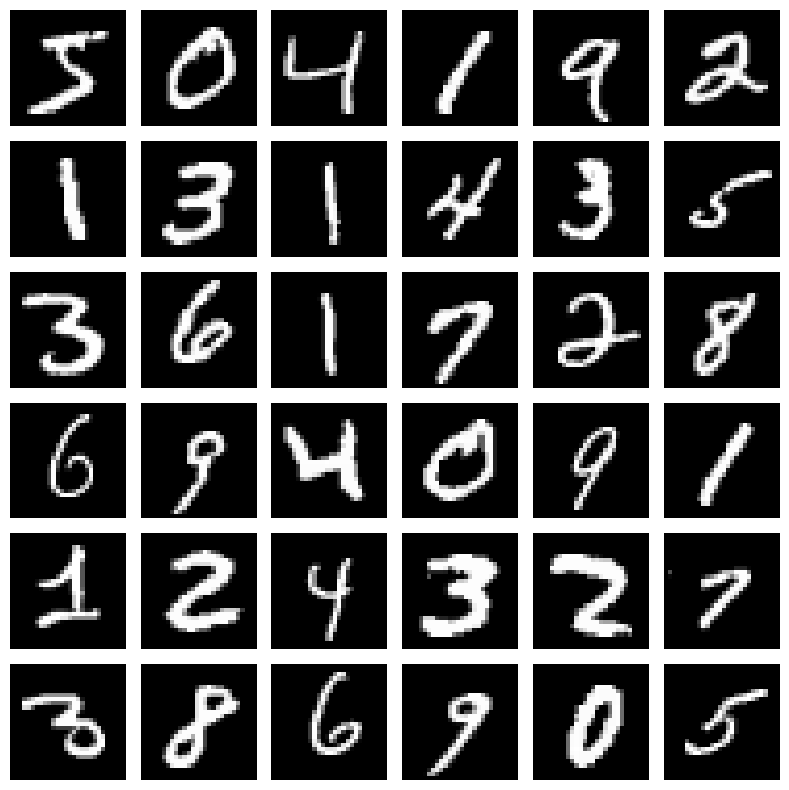

Shuffled Labels:
 [[0 2 0 8 5 9]
 [9 5 4 8 9 4]
 [8 9 1 4 2 5]
 [5 4 9 4 9 1]
 [5 1 6 7 2 6]
 [6 0 6 4 6 0]]


In [5]:
# Function for plotting
def plot_mnist_images_and_labels(dataset, shuffled_labels, num_images=36):
    fig, ax = plt.subplots(6, 6, figsize=(8, 8))
    
    # Plot MNIST images in a 6x6 grid
    for i in range(6):
        for j in range(6):
            idx = i * 6 + j
            ax[i, j].imshow(dataset[idx][0].squeeze(), cmap='gray')
            ax[i, j].axis('off')  # Hide the axis for better visualization
    
    plt.tight_layout()
    plt.show()

    # Show shuffled labels in a grid below the images
    print("Shuffled Labels:\n", np.array(shuffled_labels[:36]).reshape(6, 6))

# Display images and their shuffled labels
plot_mnist_images_and_labels(train_dataset, shuffled_labels, num_images=36)

#### 4. Model Training and Testing

In [6]:
# Initialize CNN model, loss function, and optimizer
model = DNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training and Testing loop
epochs = 1000
train_losses = []
test_losses = []

# Function to evaluate the model
def evaluate(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    with torch.no_grad():  # Disable gradient calculation
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
    model.train()  # Set the model back to training mode
    return test_loss / len(test_loader)

# Training loop
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    # Evaluate model on test set
    avg_test_loss = evaluate(model, test_loader)
    test_losses.append(avg_test_loss)
    
    # Print losses every 2 epochs
    if (epoch + 1) % 2 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

Epoch 2/1000, Train Loss: 2.3091, Test Loss: 2.3135
Epoch 4/1000, Train Loss: 2.3022, Test Loss: 2.3250
Epoch 6/1000, Train Loss: 2.2960, Test Loss: 2.3235
Epoch 8/1000, Train Loss: 2.2864, Test Loss: 2.3265
Epoch 10/1000, Train Loss: 2.2707, Test Loss: 2.3359
Epoch 12/1000, Train Loss: 2.2486, Test Loss: 2.3826
Epoch 14/1000, Train Loss: 2.2212, Test Loss: 2.3866
Epoch 16/1000, Train Loss: 2.1894, Test Loss: 2.3895
Epoch 18/1000, Train Loss: 2.1542, Test Loss: 2.3990
Epoch 20/1000, Train Loss: 2.1159, Test Loss: 2.4924
Epoch 22/1000, Train Loss: 2.0769, Test Loss: 2.4979
Epoch 24/1000, Train Loss: 2.0369, Test Loss: 2.5813
Epoch 26/1000, Train Loss: 1.9946, Test Loss: 2.5884
Epoch 28/1000, Train Loss: 1.9527, Test Loss: 2.6199
Epoch 30/1000, Train Loss: 1.9091, Test Loss: 2.6756
Epoch 32/1000, Train Loss: 1.8662, Test Loss: 2.7739
Epoch 34/1000, Train Loss: 1.8215, Test Loss: 2.7461
Epoch 36/1000, Train Loss: 1.7777, Test Loss: 2.8740
Epoch 38/1000, Train Loss: 1.7354, Test Loss: 2.85

#### Plot traning and testing losses

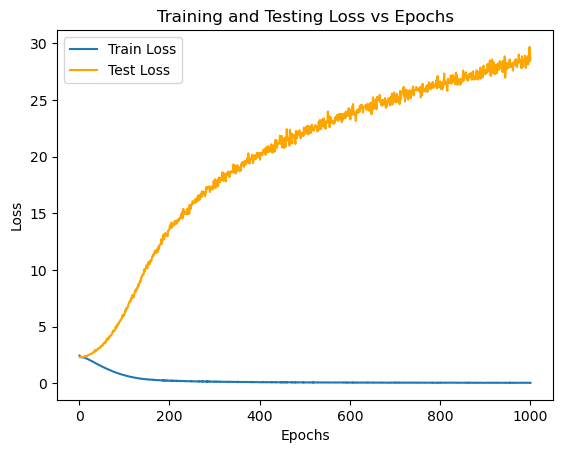

In [8]:
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss vs Epochs')
plt.legend()
plt.show()